## We will try to find out if add campaign is successfully or not
Download the dataset from here https://www.kaggle.com/rohanchreddy/advertsuccess

##### Load Library

In [1]:
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import precision_score, accuracy_score,  confusion_matrix, classification_report, auc, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
add = pd.read_csv('../input/advertsuccess/Train.csv')

In [3]:
# print the size of the data
add.shape

(26048, 12)

In [4]:
# checking the first 5 row of data set
add.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [5]:
# get the brief information about dataset
add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 26048 non-null  int64  
 1   realtionship_status                26048 non-null  object 
 2   industry                           26048 non-null  object 
 3   genre                              26048 non-null  object 
 4   targeted_sex                       26048 non-null  object 
 5   average_runtime(minutes_per_week)  26048 non-null  int64  
 6   airtime                            26048 non-null  object 
 7   airlocation                        26048 non-null  object 
 8   ratings                            26048 non-null  float64
 9   expensive                          26048 non-null  object 
 10  money_back_guarantee               26048 non-null  object 
 11  netgain                            26048 non-null  boo

In [6]:
# get the aggregation
add.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [7]:
# make id as index
add.set_index('id', inplace=True)

# sort index
add.sort_index(ascending=True, inplace=True)

In [8]:
# check missing values
add.isnull().sum()

realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [9]:
# check the number of unique value in each column
for cols in add.columns:
    print(cols, '--> ',add[cols].nunique())

realtionship_status -->  7
industry -->  6
genre -->  5
targeted_sex -->  2
average_runtime(minutes_per_week) -->  91
airtime -->  3
airlocation -->  42
ratings -->  125
expensive -->  3
money_back_guarantee -->  2
netgain -->  2


# Exploratory data analysis 

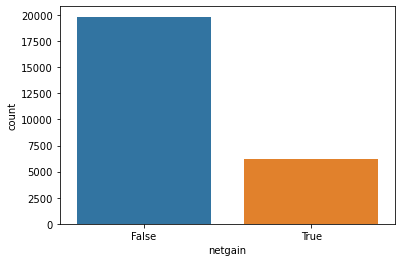

In [10]:
#Understanding the target variable netgain.
# We can see that the count of unsuccessful ads are higher.

sns.countplot('netgain',data = add)
plt.show()

In [11]:
# method to add percentage on the plot
def add_percentage(ax, total):
    for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x()+i.get_width()/2.,height + 5,'{:1.2f}'.format(height/total*100) + '%')

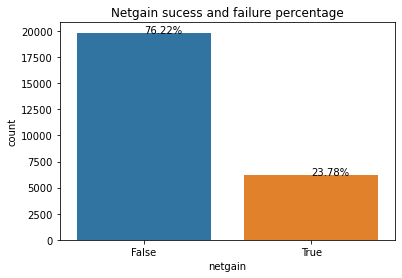

In [12]:
# Around 76% of the ad campaigns are not successful.
# 0 - False = ad campaign not successful.
# 1 - True = ad campaign successful.

total = float(len(add))
plt.title('Netgain sucess and failure percentage')
ax = sns.countplot(x="netgain", data=add)

add_percentage(ax, total)

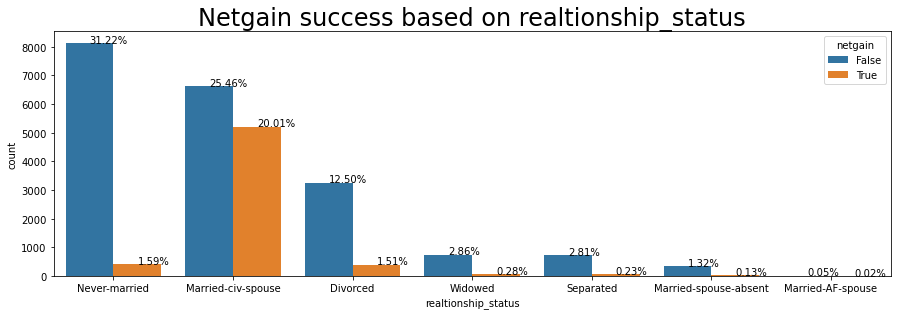

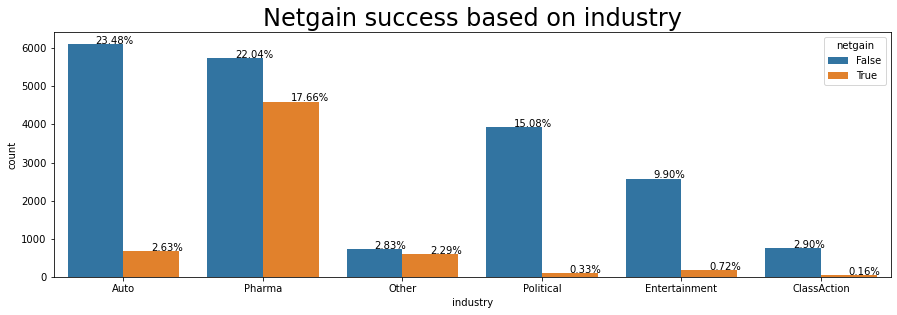

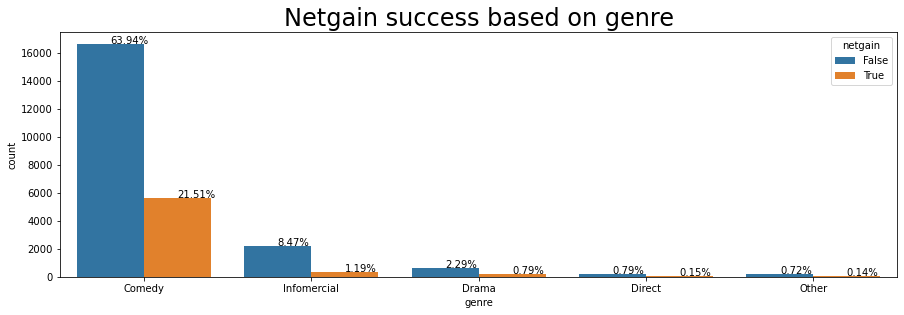

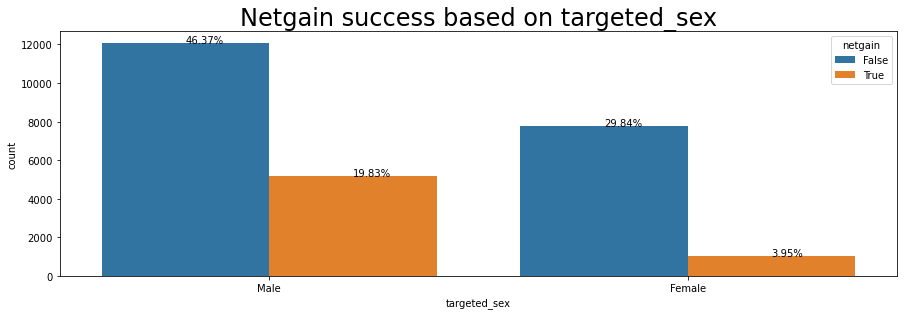

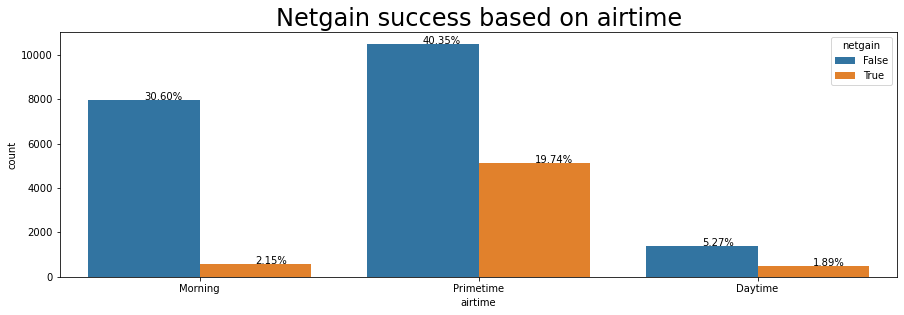

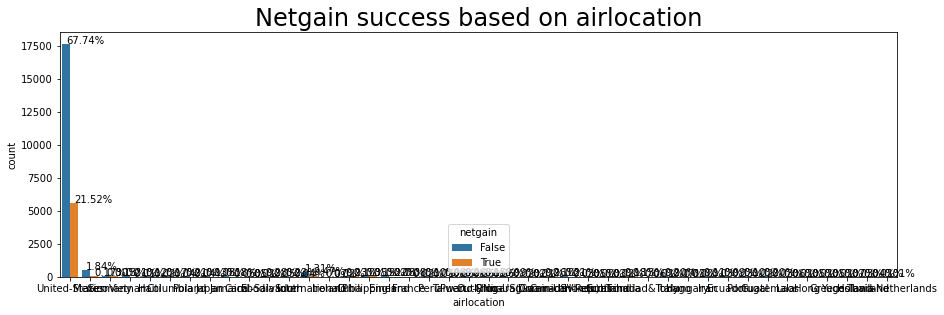

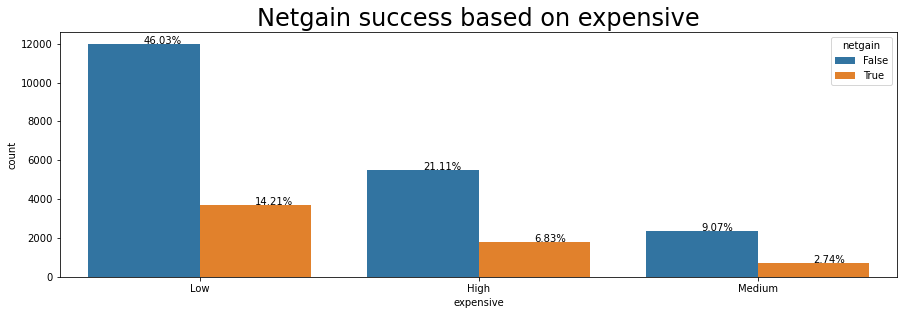

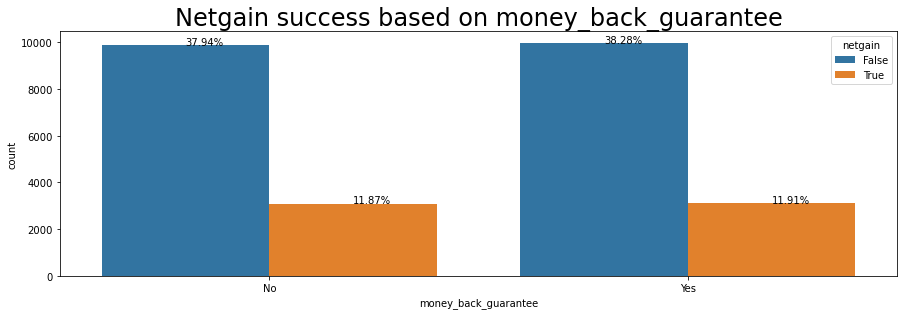

In [13]:
for cols in add.columns:
    if add[cols].dtype == 'O':
        total = float(len(add))
        plt.figure(figsize=(15,4.5))
        plt.title('Netgain success based on '+ cols, fontsize=24)
        ax = sns.countplot(x=cols, data=add, hue='netgain')

        add_percentage(ax, total)
        plt.show()

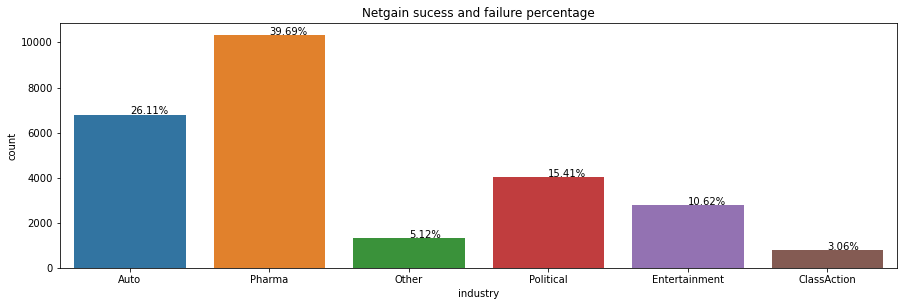

In [14]:
# As suspected above, yes Pharma industry dominates the other sectors and has the highest count of more than 10000 observations
# realted to it.Around 40% of the industry sector is contributed to Pharma industry and it also has high count of successful ads.

total = float(len(add))
plt.figure(figsize=(15,4.5))
plt.title('Netgain sucess and failure percentage')
ax = sns.countplot(x="industry", data=add)

add_percentage(ax, total)

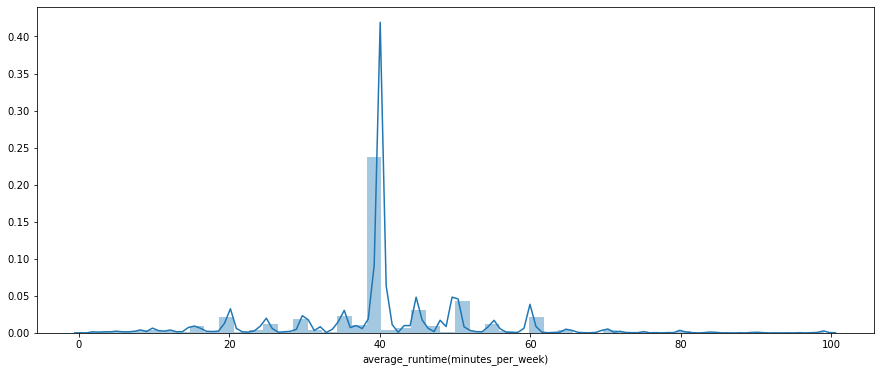

In [15]:
# We can see that the average run time of the ads per week is around 40 mins 
# i.e the ads were aired around 40 mins per week.

plt.figure(figsize=(15,6))
sns.distplot(add['average_runtime(minutes_per_week)'])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1800x1440 with 0 Axes>

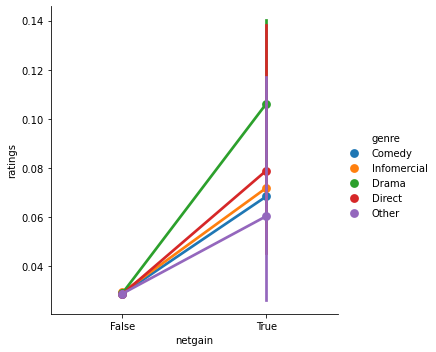

In [16]:
plt.figure(figsize=(25,20))
sns.factorplot(data=add,x='netgain',y='ratings',hue='genre')
plt.show()

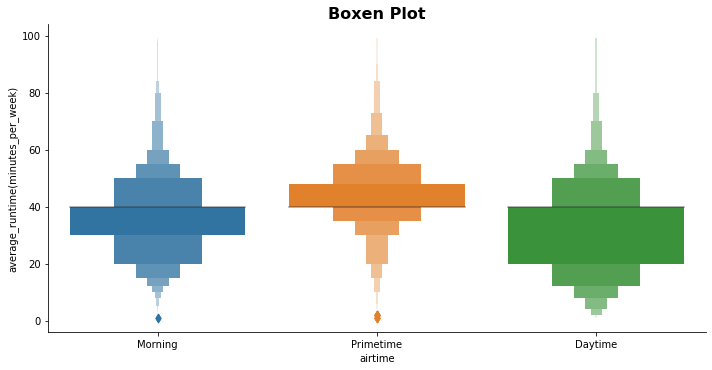

In [17]:
# Daytime ads are run more amount of time compared to the other airtimes. 

sns.catplot(x='airtime', y='average_runtime(minutes_per_week)', data=add, kind='boxen', aspect=2)
plt.title('Boxen Plot', weight='bold', fontsize=16)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 14400x28800 with 0 Axes>

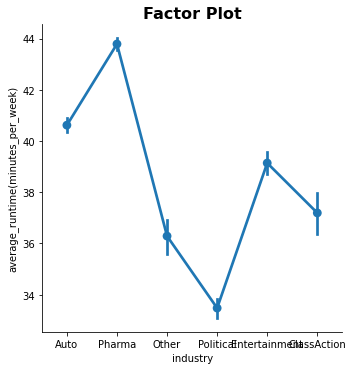

In [18]:
# Ads from pharma industry are aired more compared to others.

plt.figure(figsize=(200,400))
sns.factorplot(data=add,x='industry',y='average_runtime(minutes_per_week)')
plt.title('Factor Plot', weight='bold', fontsize=16)
plt.show()

In [19]:
# Splitting the independent and target variables.
x = add.iloc[:, :-1]
y = add.iloc[:, -1]

In [20]:
# convert categorical variable to numerical
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)
x = x.apply(LabelEncoder().fit_transform)

In [21]:
# print the size of x and y
y.shape, x.shape

((26048,), (26048, 10))

In [22]:
# train and test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print('X train size: ', x_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', x_test.shape)
print('y test size: ', y_test.shape)

X train size:  (20838, 10)
y train size:  (20838,)
X test size:  (5210, 10)
y test size:  (5210,)


## Decision Tree Classifier

In [23]:
# Decision tree classifier with grid seacrh CV and model evaluation using accuracy score, precision score and AUC/ROC curve.

parm = {'max_features': [0.5,0.6,0.7,0.8,0.9,1.0], 'max_depth': [2,3,4,5,6,7,8,9],'min_samples_leaf':[1,10,15,20,25,100],'random_state':[14]}

dtc_grid = GridSearchCV(DecisionTreeClassifier(), parm, cv=5, scoring='roc_auc')
dtc_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                         'min_samples_leaf': [1, 10, 15, 20, 25, 100],
                         'random_state': [14]},
             scoring='roc_auc')

In [24]:
print('The best parameters are: ', dtc_grid.best_params_)
print('best mean cross-validated score (auc) : ', dtc_grid.best_score_)

The best parameters are:  {'max_depth': 8, 'max_features': 0.8, 'min_samples_leaf': 25, 'random_state': 14}
best mean cross-validated score (auc) :  0.8586127694884679


In [25]:
y_pred = dtc_grid.predict(x_test)
precision_score_DT_test =  precision_score(y_test, y_pred)
accuracy_score_DT_test = accuracy_score(y_test, y_pred)
print('The precision score of decision tree on TEST is : ',round(precision_score_DT_test * 100,2), '%')
print('The accuracy score of decision tree on TEST is : ',round(accuracy_score_DT_test * 100,2), '%')

The precision score of decision tree on TEST is :  64.16 %
The accuracy score of decision tree on TEST is :  81.67 %



Among all predictions for add, 64.16% are successful.

81.67 % of the succcessful ads were predicted correctly.

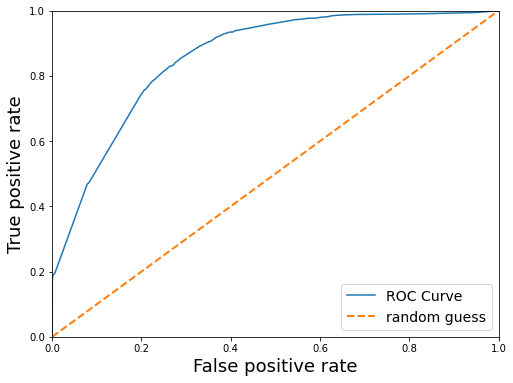

DT AUC is:  85.82 %


In [26]:
adsu = dtc_grid.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr, label="ROC Curve")
x = np.linspace(0,1,num=50)
plt.plot(x,x,linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1,4)
plt.ylim(0,1,4)
plt.show()

AUC_DT = auc(fpr,tpr)
print('DT AUC is: ', round(AUC_DT * 100,2), '%')

In [57]:
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4006
           1       0.69      0.44      0.54      1204

    accuracy                           0.82      5210
   macro avg       0.77      0.69      0.71      5210
weighted avg       0.81      0.82      0.81      5210



# Bagging

## Bagging using Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

param = {'n_estimators':[700],'n_jobs':[-1], 'max_features': [0.5,0.7,0.9], 'max_depth': [3,5,7],'min_samples_leaf':[1,10],'random_state':[14]}

rfc_grid = GridSearchCV(RandomForestClassifier(), param, cv=5, scoring='roc_auc')
rfc_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.5, 0.7, 0.9],
                         'min_samples_leaf': [1, 10], 'n_estimators': [700],
                         'n_jobs': [-1], 'random_state': [14]},
             scoring='roc_auc')

In [29]:
print('The best parameters are: ', rfc_grid.best_params_)
print('best mean cross-validated score (auc) : ', rfc_grid.best_score_)

The best parameters are:  {'max_depth': 7, 'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 700, 'n_jobs': -1, 'random_state': 14}
best mean cross-validated score (auc) :  0.8643071453349911


In [56]:
y_pred = rfc_grid.predict(x_test)
precision_score_RF_test =  precision_score(y_test, y_pred)
accuracy_score_RF_test = accuracy_score(y_test, y_pred)
print('The precision score on TEST is : ',round(precision_score_RF_test * 100,2), '%')
print('The accuracy score on TEST is : ',round(accuracy_score_RF_test * 100,2), '%')

The precision score on TEST is :  68.92 %
The accuracy score on TEST is :  82.48 %



Among all predictions for ad to be successful, 68.92% are successful.

82.48 % of the succcessful ads were predicted correctly.

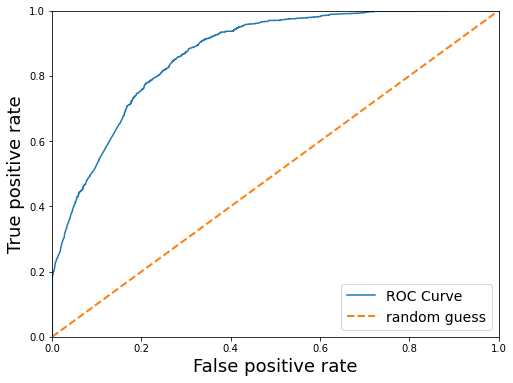

RF AUC is:  86.89 %


In [33]:
# Now let's plot the ROC curve and calculate AUC on the test set

adsu = rfc_grid.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr, label='ROC Curve')
x = np.linspace(0,1,num=50)
plt.plot(x,x,linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

AUC_RF = auc(fpr,tpr)
print('RF AUC is: ', round(AUC_RF * 100,2), '%')

In [58]:
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4006
           1       0.69      0.44      0.54      1204

    accuracy                           0.82      5210
   macro avg       0.77      0.69      0.71      5210
weighted avg       0.81      0.82      0.81      5210



## Bagging using BaggingClassifier

## We will use -> k-nearest neighbor 

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=3)

knc_bc = BaggingClassifier(base_estimator=knc, n_estimators=30, max_samples=0.8, max_features=0.8)

knc_bc.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  max_features=0.8, max_samples=0.8, n_estimators=30)

In [55]:
y_pred = knc_bc.predict(x_test)
precision_score_RF_test =  precision_score(y_test, y_pred)
accuracy_score_RF_test = accuracy_score(y_test, y_pred)
print('The precision score  on TEST is : ',round(precision_score_RF_test * 100,2), '%')
print('The accuracy score  on TEST is : ',round(accuracy_score_RF_test * 100,2), '%')

The precision score  on TEST is :  65.76 %
The accuracy score  on TEST is :  81.8 %


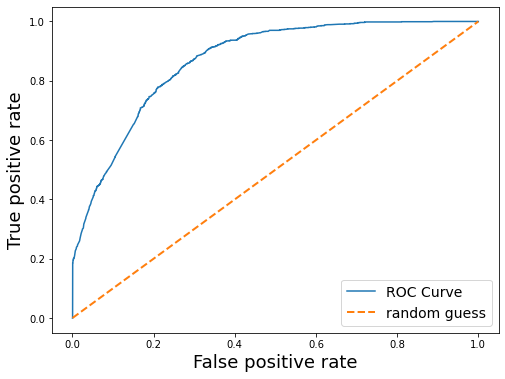

RF AUC is:  86.89 %


In [49]:
# Now let's plot the ROC curve and calculate AUC on the test set

adsu = rfc_grid.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr, label='ROC Curve')
x = np.linspace(0,1,num=50)
plt.plot(x,x,linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.show()

AUC_RF = auc(fpr,tpr)
print('RF AUC is: ', round(AUC_RF * 100,2), '%')

In [59]:
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))


Classification Report TEST:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4006
           1       0.69      0.44      0.54      1204

    accuracy                           0.82      5210
   macro avg       0.77      0.69      0.71      5210
weighted avg       0.81      0.82      0.81      5210



## Bagging using Voting Classifier
## We will use -> support vector machine, Random Forest, Logistic Regression

In [51]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

rfClf = RandomForestClassifier(n_estimators=500, random_state=0) # 500 trees. 
svmClf = SVC(probability=True, random_state=0) # probability calculation
logClf = LogisticRegression(random_state=0)

vc = VotingClassifier(estimators= [('rf',rfClf), ('svm',svmClf), ('log', logClf)], voting='soft')

vc.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=0)),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('log', LogisticRegression(random_state=0))],
                 voting='soft')

In [54]:
y_pred = vc.predict(x_test)
precision_score_RF_test =  precision_score(y_test, y_pred)
accuracy_score_RF_test = accuracy_score(y_test, y_pred)
print('The precision score  on TEST is : ',round(precision_score_RF_test * 100,2), '%')
print('The accuracy score  on TEST is : ',round(accuracy_score_RF_test * 100,2), '%')

The precision score  on TEST is :  89.09 %
The accuracy score  on TEST is :  81.02 %


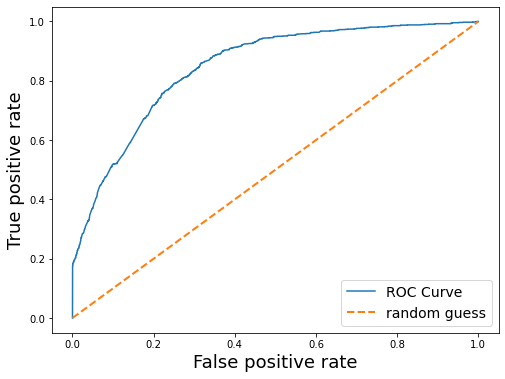

RF AUC is:  84.65 %


In [53]:
# Now let's plot the ROC curve and calculate AUC on the test set

adsu = vc.predict_proba(x_test)[:,1]
plt.subplots(figsize=(8,6))
fpr, tpr, thresholds = roc_curve(y_test, adsu)
plt.plot(fpr, tpr, label='ROC Curve')
x = np.linspace(0,1,num=50)
plt.plot(x,x,linestyle='--',marker='',lw=2,label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.show()

AUC_RF = auc(fpr,tpr)
print('RF AUC is: ', round(AUC_RF * 100,2), '%')

In [ ]:
print ('\nClassification Report TEST:\n', classification_report(y_test,y_pred))

https://github.com/vsmolyakov/experiments_with_python/blob/master/chp01/ensemble_methods.ipynb

https://github.com/anjuraj-ops/Projects-in-data-science/blob/master/advertisment_success_Anju.ipynb